In [9]:
!pip install pandas numpy matplotlib

154.70s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


zsh:1: command not found: pip


In [10]:
import pandas as pd                # Importa a biblioteca pandas para manipulação de dados
import seaborn as sns              # Importa a biblioteca seaborn para criar gráficos
import matplotlib.pyplot as plt    # Importa a biblioteca matplotlib para customização e exibição de gráficos
import numpy as np                 # Importa a biblioteca numpy para cálculos numéricos
import plotly.express as px



ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Carregando o DataFrame
df = pd.read_csv('dados_limpos.csv')  # Substitua 'dados_limpos.csv' pelo nome correto do arquivo
df

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


<Axes: >

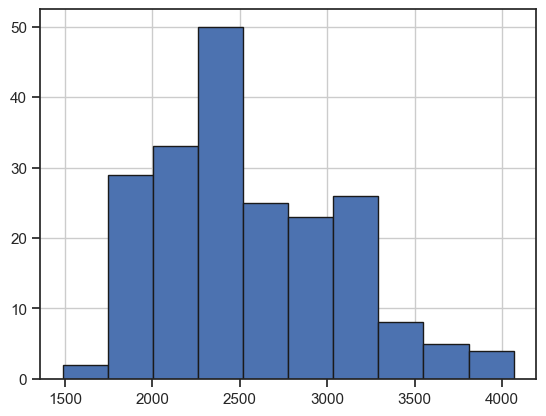

In [ ]:
## Aplicar uma fórmula para calcular novas colunas

df['curb-weight'].hist(edgecolor='k')

<Axes: >

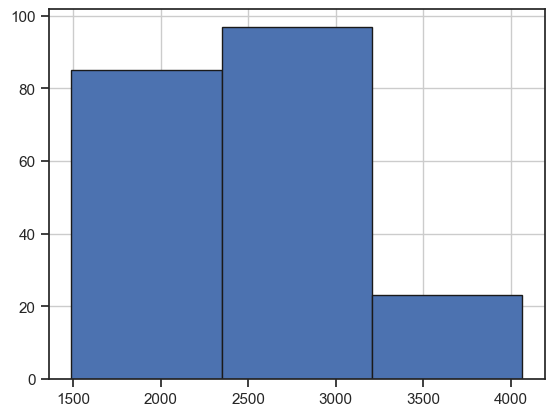

In [ ]:
df['curb-weight'].hist(edgecolor='k', bins=3)

In [ ]:
pd.cut(df['curb-weight'], 3)

0      (2347.333, 3206.667]
1      (2347.333, 3206.667]
2      (2347.333, 3206.667]
3      (1485.422, 2347.333]
4      (2347.333, 3206.667]
               ...         
200    (2347.333, 3206.667]
201    (2347.333, 3206.667]
202    (2347.333, 3206.667]
203      (3206.667, 4066.0]
204    (2347.333, 3206.667]
Name: curb-weight, Length: 205, dtype: category
Categories (3, interval[float64, right]): [(1485.422, 2347.333] < (2347.333, 3206.667] < (3206.667, 4066.0]]

In [ ]:
pd.cut(df['curb-weight'], 3, labels=['leve', 'medio', 'pesado'])

KeyError: 'curb-weight'

In [ ]:
#Usando a informação dos quartis para determinar se algo é baixo, médio ou alto:

#Entendendo melhor a questão dos quartis. Percentual dos dados em cada limite de uma distribuição normal.

In [ ]:
df['curb-weight'].quantile([0.25, 0.5, 0.75])

KeyError: 'curb-weight'

<Axes: >

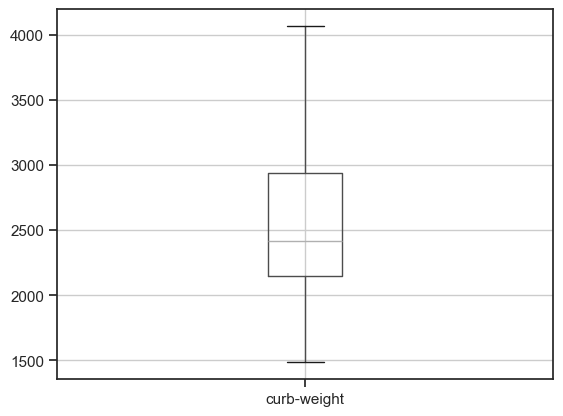

In [ ]:
df[['curb-weight']].boxplot()

In [ ]:
# Normalizando a coluna 'price'
df['price_normalized'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())


In [ ]:
# Calculando os Quartis
Q1 = df['price'].quantile(0.25)  # Calcula o primeiro quartil (Q1), que é o valor abaixo do qual 25% dos dados estão
Q3 = df['price'].quantile(0.75)  # Calcula o terceiro quartil (Q3), que é o valor abaixo do qual 75% dos dados estão


In [ ]:
# Criando a coluna 'Categoria_Preco' e classificando os preços
df['Categoria_Preco'] = 'Médio'  # Inicializando com 'Médio'
df.loc[df['price'] < Q1, 'Categoria_Preco'] = 'Baixo'  # Preços abaixo do Primeiro Quartil
df.loc[df['price'] > Q3, 'Categoria_Preco'] = 'Alto'   # Preços acima do Terceiro Quartil


KeyError: 'price'

In [ ]:
# Passo 2: Classificar os preços
df['Categoria_Preco'] = pd.cut(df['price'], bins=[-float('inf'), Q1, Q3, float('inf')], labels=['Baixo', 'Médio', 'Alto'])


In [ ]:
# Exibir o DataFrame atualizado
df[['price', 'Categoria_Preco']].head()

,price,Categoria_Preco
0,13495.0,Médio
1,16500.0,Médio
2,16500.0,Médio
3,13950.0,Médio
4,17450.0,Alto


In [ ]:
# Exibir as primeiras linhas do DataFrame atualizado
df[['price', 'Categoria_Preco']].head()

,price,Categoria_Preco
0,13495.0,Médio
1,16500.0,Médio
2,16500.0,Médio
3,13950.0,Médio
4,17450.0,Alto


In [ ]:
# Classificando os preços
df['Categoria_Preco'] = pd.cut(df['price'], bins=[-float('inf'), Q1, Q3, float('inf')], labels=['Baixo', 'Médio', 'Alto'])  
# Cria uma nova coluna 'Categoria_Preco' no DataFrame, classificando os preços em 'Baixo', 'Médio', 'Alto' com base nos quartis

In [ ]:
# Exibindo as primeiras linhas do DataFrame
print(df.head())

   symboling         make fuel-type aspiration num-of-doors   body-style  \
0          3  alfa-romero       gas        std          two  convertible   
1          3  alfa-romero       gas        std          two  convertible   
2          1  alfa-romero       gas        std          two    hatchback   
3          2         audi       gas        std         four        sedan   
4          2         audi       gas        std         four        sedan   

  drive-wheels engine-location  wheel-base  length  ...  stroke  \
0          rwd           front        88.6   168.8  ...    2.68   
1          rwd           front        88.6   168.8  ...    2.68   
2          rwd           front        94.5   171.2  ...    3.47   
3          fwd           front        99.8   176.6  ...    3.40   
4          4wd           front        99.4   176.6  ...    3.40   

   compression-ratio  horsepower peak-rpm city-mpg  highway-mpg    price  \
0                9.0       111.0   5000.0       21           27 

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df, hue="curb-weight-cat")

In [ ]:
# Análise estatística básica da coluna 'price'
mean_price = df['price'].mean()
median_price = df['price'].median()
std_price = df['price'].std()
print(f"Média do Preço: {mean_price:.2f}")
print(f"Mediana do Preço: {median_price:.2f}")
print(f"Desvio Padrão do Preço: {std_price:.2f}")


Média do Preço: 13207.13
Mediana do Preço: 10595.00
Desvio Padrão do Preço: 7868.77


In [ ]:
# Configuração do estilo para Dark Mode
plt.style.use('dark_background')

In [ ]:
import matplotlib.pyplot as plt


/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_23414/1516901718.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




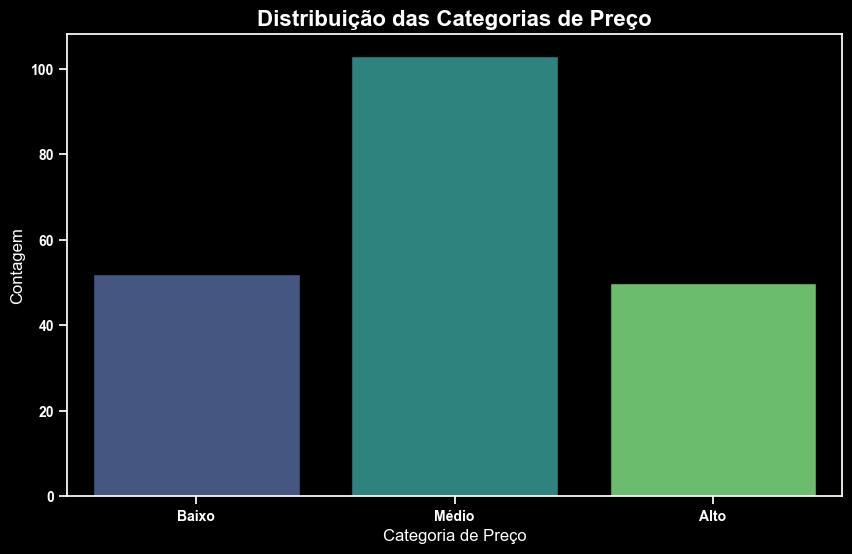

In [ ]:
# Gráfico de Barras: Distribuição das Categorias de Preço
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico
sns.countplot(x='Categoria_Preco', data=df, palette='viridis', edgecolor='black')  # Cria um gráfico de barras para contar as categorias de preço
plt.title('Distribuição das Categorias de Preço', fontsize=16, weight='bold')  # Define o título do gráfico com formatação de texto
plt.xlabel('Categoria de Preço', fontsize=12)  # Define o rótulo do eixo X com formatação de texto
plt.ylabel('Contagem', fontsize=12)  # Define o rótulo do eixo Y com formatação de texto
plt.xticks(fontsize=10, weight='bold')  # Formata os rótulos do eixo X
plt.yticks(fontsize=10, weight='bold')  # Formata os rótulos do eixo Y
plt.style.use('dark_background')  # Aplica o tema dark para o gráfico
plt.show()  # Exibe o gráfico

/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_23414/2181822114.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




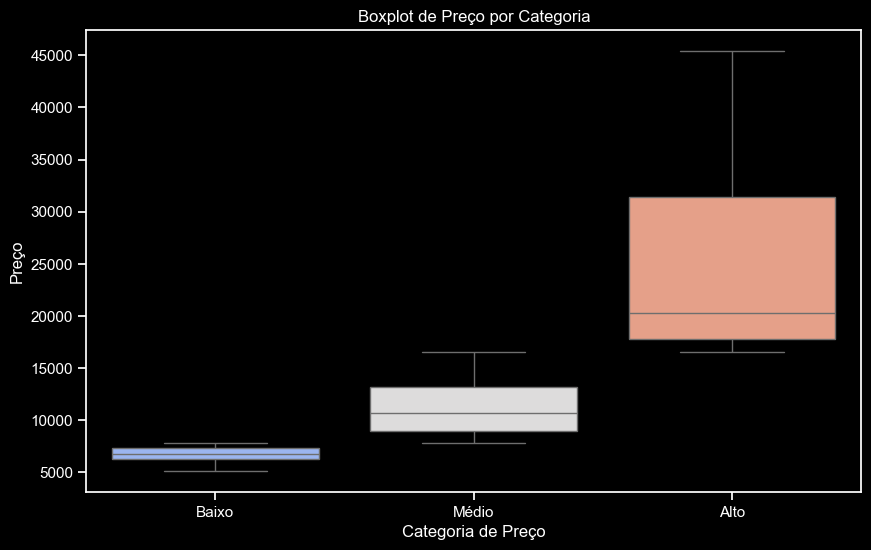

In [ ]:
#1 opcao Visualização: Boxplot de Preço por Categoria
plt.figure(figsize=(10, 6))
sns.boxplot(x='Categoria_Preco', y='price', data=df, palette='coolwarm')
plt.title('Boxplot de Preço por Categoria')
plt.xlabel('Categoria de Preço')
plt.ylabel('Preço')
plt.show()

/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_23414/1670106064.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




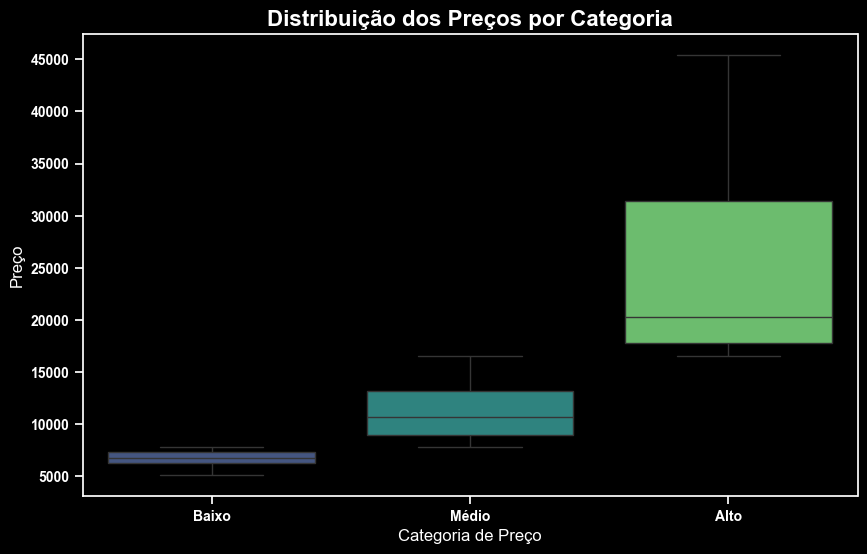

In [ ]:
# Boxplot: 2 opcao Distribuição dos Preços por Categoria
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico
sns.boxplot(x='Categoria_Preco', y='price', data=df, palette='viridis')  # Cria um boxplot para mostrar a distribuição dos preços por categoria
plt.title('Distribuição dos Preços por Categoria', fontsize=16, weight='bold')  # Define o título do gráfico com formatação de texto
plt.xlabel('Categoria de Preço', fontsize=12)  # Define o rótulo do eixo X com formatação de texto
plt.ylabel('Preço', fontsize=12)  # Define o rótulo do eixo Y com formatação de texto
plt.xticks(fontsize=10, weight='bold')  # Formata os rótulos do eixo X
plt.yticks(fontsize=10, weight='bold')  # Formata os rótulos do eixo Y
plt.style.use('dark_background')  # Aplica o tema dark para o gráfico
plt.show()  # Exibe o gráfico

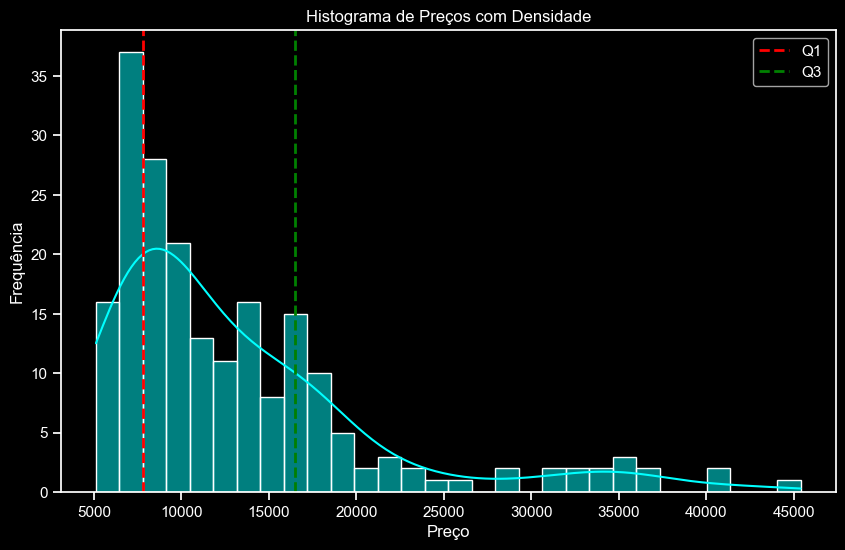

In [ ]:
# Visualização: Histograma de Preços com linha de densidade
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, color='cyan', bins=30, edgecolor='white')
plt.title('Histograma de Preços com Densidade')
plt.xlabel('Preço')
plt.ylabel('Frequência')
plt.axvline(Q1, color='red', linestyle='dashed', linewidth=2, label='Q1') # type: ignore
plt.axvline(Q3, color='green', linestyle='dashed', linewidth=2, label='Q3')
plt.legend()
plt.show()


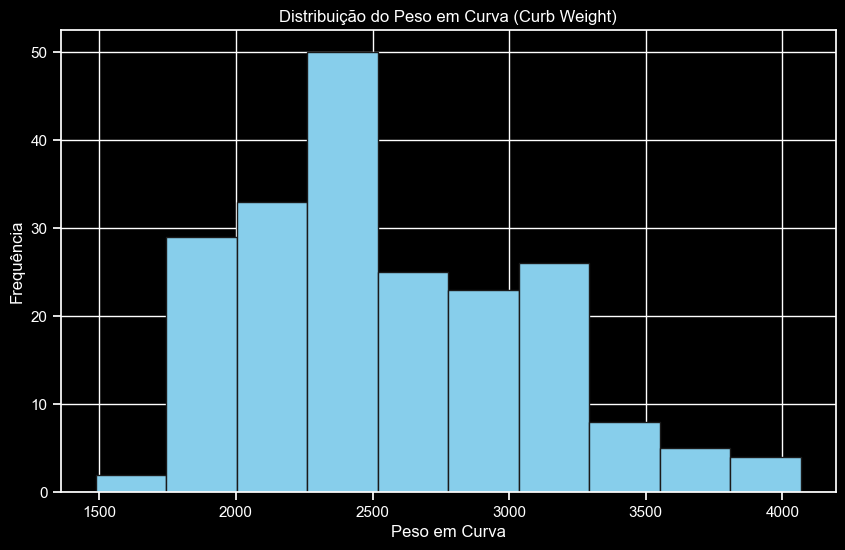

In [ ]:
# Histograma básico para 'curb-weight'
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico
df['curb-weight'].hist(edgecolor='k', color='skyblue')  # Cria um histograma básico para 'curb-weight' com bordas pretas
plt.title('Distribuição do Peso em Curva (Curb Weight)')  # Define o título do gráfico
plt.xlabel('Peso em Curva')  # Define o rótulo do eixo X
plt.ylabel('Frequência')  # Define o rótulo do eixo Y
plt.style.use('dark_background')  # Aplica o tema dark para o gráfico
plt.show()  # Exibe o gráfico

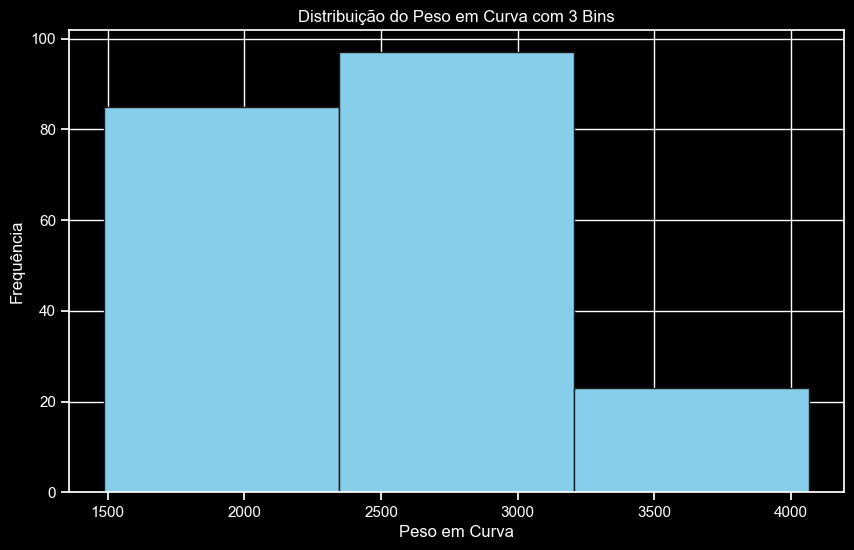

In [ ]:
# Histograma com 3 bins
plt.figure(figsize=(10, 6))  # Define o tamanho da figura do gráfico
df['curb-weight'].hist(edgecolor='k', bins=3, color='skyblue')  # Cria um histograma com 3 bins para 'curb-weight' com bordas pretas
plt.title('Distribuição do Peso em Curva com 3 Bins')  # Define o título do gráfico
plt.xlabel('Peso em Curva')  # Define o rótulo do eixo X
plt.ylabel('Frequência')  # Define o rótulo do eixo Y
plt.style.use('dark_background')  # Aplica o tema dark para o gráfico
plt.show()  # Exibe o gráfico


/var/folders/sp/qr0jn46s10x5j0y77wb390d00000gn/T/ipykernel_23414/2026554494.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




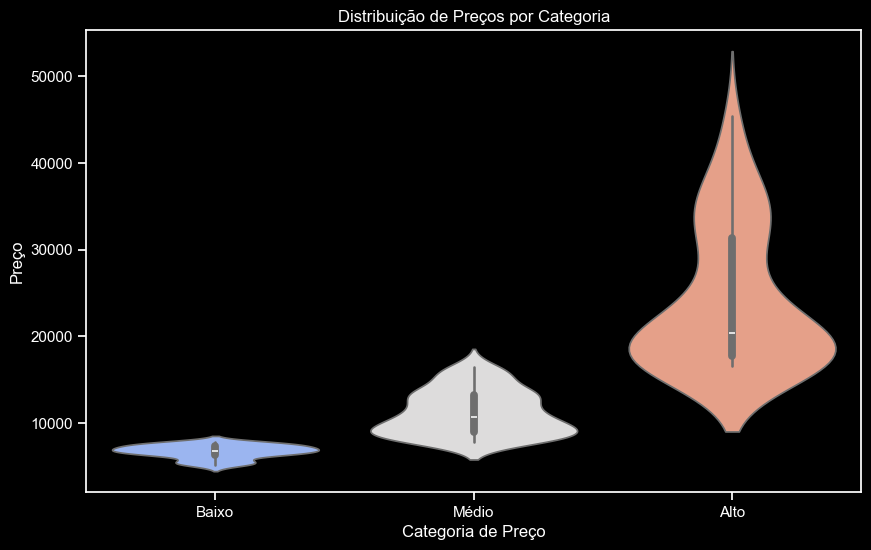

In [ ]:
# Visualização: Gráfico de violino para mostrar a distribuição dos preços em cada categoria
plt.figure(figsize=(10, 6))
sns.violinplot(x='Categoria_Preco', y='price', data=df, palette='coolwarm')
plt.title('Distribuição de Preços por Categoria')
plt.xlabel('Categoria de Preço')
plt.ylabel('Preço')
plt.show()


In [ ]:
# Visualização interativa com Plotly
fig = px.histogram(df, x='price', color='Categoria_Preco', nbins=30,
                   title='Histograma Interativo de Preços por Categoria')
fig.show()


In [ ]:
# Classificação de 'curb-weight' em 3 categorias
df['Curb_Weight_Category'] = pd.cut(df['curb-weight'], 3, labels=['leve', 'médio', 'pesado'])  
# Cria uma nova coluna 'Curb_Weight_Category' no DataFrame, categorizando 'curb-weight' em 'leve', 'médio' e 'pesado'


In [ ]:
# Salvando o DataFrame modificado em um novo arquivo CSV
df.to_csv('dados_classificados.csv', index=False)
print("DataFrame classificado salvo em 'dados_classificados.csv'.")

DataFrame classificado salvo em 'dados_classificados.csv'.
